In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import itertools

# Dataset - Class Distribution Across Feature Pairs

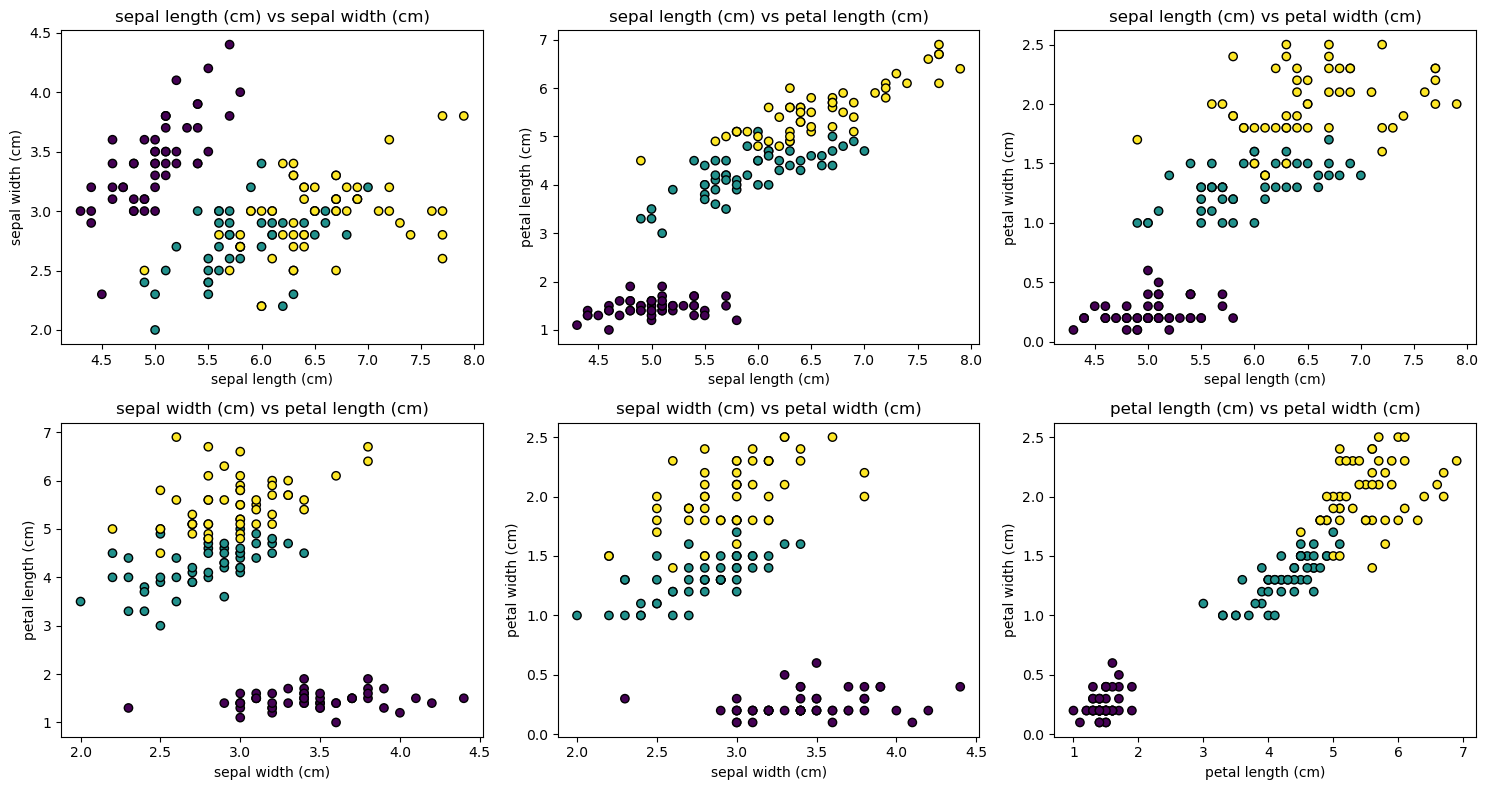

In [145]:
data = load_iris()
X = data.data
y = data.target

pairs = list(itertools.combinations(range(X.shape[1]) , 2))

fig, ax = plt.subplots(2 , 3 , figsize = (15, 8))
ax = ax.ravel()
for idx, (i, j) in enumerate(pairs):
    ax[idx].scatter(X[:, i] , X[:, j] , c = y,cmap='viridis', edgecolor='k')
    ax[idx].set_xlabel(data.feature_names[i])
    ax[idx].set_ylabel(data.feature_names[j])
    ax[idx].set_title(f"{data.feature_names[i]} vs {data.feature_names[j]}")

plt.tight_layout()
plt.show()



# KNN Model class

In [146]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2 , axis = 1))

class KNN:
    def __init__(self, k = 3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict_one(self, x):
        distances = euclidean_distance(x, self.X_train)
        dist_idx = np.argsort(distances)[:self.k]
        k_labels = self.y_train[dist_idx]
        v, c = np.unique(k_labels, return_counts = True)
        return v[np.argmax(c)]
        
    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])

    def get_neighbour(self, x):
        distances = euclidean_distance(x, self.X_train)
        dist_idx = np.argsort(distances)[:self.k]
        return dist_idx


# Utility functions

In [147]:
def train_test_split(X, y, ratio, shuffle = False, seed = False):
    if seed:
        np.random.seed(seed)
    if shuffle:
        index = np.arange(len(X))
        np.random.shuffle(index)
        X, y = X[index], y[index]
    divider = int(len(X) * ratio)
    train_X = X[: divider]
    test_X = X[divider: ]
    train_y = y[: divider]
    test_y = y[divider: ]
    return train_X, train_y, test_X, test_y

def accuracy(y_true, y_pred):
        return np.mean(y_true == y_pred)

def standardize(train_X ,test_X):
    mean = train_X.mean(axis = 0)
    std = train_X.std(axis = 0)
    train_scaled = (train_X - mean) / std
    test_scaled = (test_X - mean) / std
    return train_scaled, test_scaled

# Model execution

In [152]:
train_X, train_y, test_X, test_y = train_test_split(X , y, ratio = 0.6 , shuffle = True, seed = 4)
train_X ,test_X = standardize(train_X ,test_X)
model = KNN(k = 5)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print('Accuracy : ',accuracy(test_y, y_pred))

Accuracy :  0.9833333333333333


# Visualizing Nearest Neighbors (2D projection)
### This plot shows the nearest neighbors of selected test points projected into 2D using only the first two features.
### It is intended for conceptual understanding only — the actual KNN model calculates distances in the full 4-dimensional feature space.
### Points that appear close here may not be actual neighbors in higher dimensions, and vice versa.

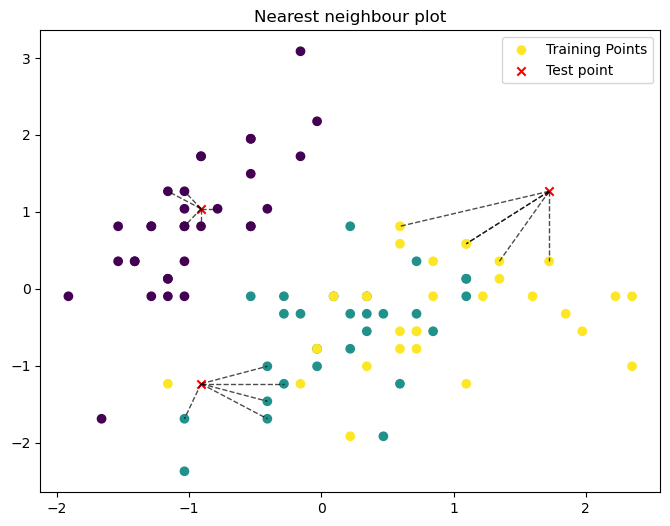

In [159]:
test_points = test_X[np.random.choice(len(test_X) , size = 3, replace = False)]

plt.figure(figsize = (8 , 6))
plt.scatter(model.X_train[:, 0], model.X_train[:, 1], c=model.y_train , cmap='viridis', label="Training Points")

for i, test_point in enumerate(test_points):
    if i == 0:
        label = 'Test point'
    else:
        label = None
    plt.scatter(test_point[0], test_point[1], c = 'red' , marker = 'x', label = label)

    neighbour_idx = model.get_neighbour(test_point) 


    for idx in neighbour_idx:
        plt.plot([test_point[0], model.X_train[idx, 0]], 
                 [test_point[1], model.X_train[idx, 1]], 
                 'k--', lw=1, alpha=0.7)


plt.title('Nearest neighbour plot')
plt.legend()
plt.show()
        